In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
train_data = pd.read_csv('./Tashu/total_rent.csv')
train_data['MONTH'] = train_data['MONTH'].astype('object')
train_data['HOUR'] = train_data['HOUR'].astype('object')
train_data['WEEKDAY'] = train_data['WEEKDAY'].astype('object')
train_data['SEASON'] = train_data['SEASON'].astype('object')
train_data.head(5)

,STATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,Count
0,1,-8.8,0.0,0.1,90.0,8.8,2013,1,1,0,1,3,0.0
1,1,-8.5,0.0,0.9,90.0,8.8,2013,1,1,1,1,3,0.0
2,1,-8.5,0.0,1.0,89.0,8.8,2013,1,1,2,1,3,0.0
3,1,-9.0,0.0,0.7,91.0,8.8,2013,1,1,3,1,3,0.0
4,1,-9.1,0.0,0.6,92.0,8.8,2013,1,1,4,1,3,0.0


In [3]:
train_data = train_data[train_data.YEAR == 2015]
train_data = train_data[train_data.MONTH == 1]
train_data = train_data[train_data.DAY == 1]
train_data = train_data[train_data.STATION == 3]
train_data.tail()
train_data = train_data.fillna(0)
train_data.head()

,STATION,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL,YEAR,MONTH,DAY,HOUR,WEEKDAY,SEASON,Count
70080,3,-4.1,0.3,4.2,82.0,0.5,2015,1,1,0,3,3,0.0
70081,3,-5.7,0.0,2.8,74.0,0.5,2015,1,1,1,3,3,0.0
70082,3,-6.4,0.0,2.6,60.0,0.5,2015,1,1,2,3,3,0.0
70083,3,-6.5,0.0,2.7,53.0,0.5,2015,1,1,3,3,3,0.0
70084,3,-6.6,0.0,2.5,61.0,0.5,2015,1,1,4,3,3,0.0


In [4]:
X = train_data['HOUR']
del train_data['STATION']
del train_data['YEAR']
del train_data['MONTH']
del train_data['WEEKDAY']
del train_data['DAY']
del train_data['HOUR']
del train_data['SEASON']
train_data = train_data.fillna(0)
train_data.head()

,TEMPERATURE,RAINFALL,WINDSPEED,HUMIDITY,SNOWFALL,Count
70080,-4.1,0.3,4.2,82.0,0.5,0.0
70081,-5.7,0.0,2.8,74.0,0.5,0.0
70082,-6.4,0.0,2.6,60.0,0.5,0.0
70083,-6.5,0.0,2.7,53.0,0.5,0.0
70084,-6.6,0.0,2.5,61.0,0.5,0.0


In [5]:
X_train = train_data.iloc[:, :-1].values
y_train = train_data.iloc[:, -1].values

In [6]:
# Randomforest를 통한 학습 진행 tree 개수는 50개 
rf = RandomForestRegressor(n_estimators= 50)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [7]:
predictions = rf.predict(X_train)

In [8]:
# RSME 계산
errors = np.sqrt(np.mean((predictions - y_train)**2))
print('Error:',round(errors,2), 'degrees.')

Error: 0.57 degrees.


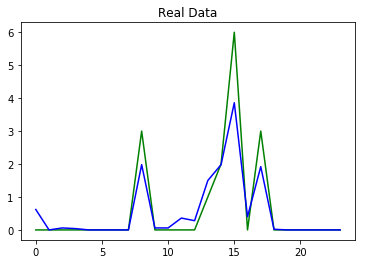

In [9]:
plt.title('Real Data')
plt.plot(X,y_train,color='green',linestyle='solid')
plt.plot(X,predictions,color='blue',linestyle='solid')

plt.show()